In [1]:
## predict age with brain imaging features
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
print(mpl.__version__)
#from time import time


# newly merged file (SUBJID and bblid) with pandas:
pnc_behav_mental = pd.read_csv("data/pyresult01_pnc_behav_mental.csv", delimiter = ",")
print(pnc_behav_mental.shape)

# remove subjects with excessive head motion
# head_motion_subjects = pd.read_csv("data/head_motion_subject_delete.txt", delimiter = "\t", header = None)
# #print(head_motion_subjects)
# head_motion_sublist = head_motion_subjects.iloc[:,0].tolist()
# pnc_behav_mental = pnc_behav_mental[~pnc_behav_mental.SUBJID.isin(head_motion_sublist)]

# remove samples with Med_rating higher than 1:
pnc_behav_mental["Med_Rating"] = pnc_behav_mental["Med_Rating"].apply(pd.to_numeric, errors='coerce')
pnc_behav_mental = pnc_behav_mental.loc[pnc_behav_mental["Med_Rating"]<2,:]
# pnc_behav_mental['Sex'] = pnc_behav_mental['Sex'].apply({'F':0, 'M':1}.get)


# select subjects with brain imaging data:
cat_vbm = pd.read_csv("data/ROI_catROI_neuromorphometrics_Vgm.csv", delimiter = ",")
pnc_behav_mental = pnc_behav_mental.merge(cat_vbm, how = 'inner', left_on = 'SUBJID', right_on = 'names')
      
print(pnc_behav_mental.head())

cog_label_acc = [
    # executive control:
    "pcet_acc2",
    "pcpt_t_tp",
    "lnb_tp2",
    # episodic memory task:
    "pwmt_kiwrd_tot",
    "pfmt_ifac_tot",
    "volt_svt",
    # complex cognitive task:
    "pvrt_cr",
    "pmat_cr",
    "plot_tc",
    # social cognition task:
    "peit_cr",
    "pedt_a",
    "padt_a"
]

cog_label_speed = [
    # executive control:
    "pcet_rtcr",
    "pcpt_t_tprt",
    "lnb_rtc2",
    # episodic memory task:
    "pwmt_kiwrd_rtc",
    "pfmt_ifac_rtc",
    "volt_svtcrt",
    # complex cognitive task:
    "pvrt_rtcr",
    "pmat_rtcr",
    "plot_tcrt",
    # social cognition task:
    "peit_crt",
    "pedt_t",
    "padt_t",
    # sensorimotor speed task:
    "mp_mp2rtcr",
    "tap_tot"
]

cog_label_acc2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI"
]

cog_label_speed2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI",
    # sensorimotor speed task:
    "MOT",
    "SM"
]

cog_score_label = cog_label_acc + cog_label_speed
cog_score_label2 = [s + '_Accuracy' for s in cog_label_acc2] + [s + '_Speed' for s in cog_label_speed2]
num_cog = len(cog_score_label)


2.2.2


/home/xin/environments/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8519, 181)
      bblid        SUBJID Sex  Med_Rating  age_at_cnb battery_valid  \
0  117129.0  6.000100e+11   F         1.0         9.0             V   
1  127386.0  6.000189e+11   F         1.0        15.0             V   
2   94599.0  6.000387e+11   F         1.0        11.0             V   
3  101501.0  6.000390e+11   M         1.0        11.0             V   
4  101368.0  6.000397e+11   M         1.0         9.0             V   

  padt_genus padt_valid  padt_a  padt_t    ...      lSupParLo  rSupParLo  \
0     PADT36          V    23.0  4888.0    ...        11.7281    11.6986   
1     PADT36          V    30.0  2123.5    ...         9.1360     9.3788   
2     PADT36          V    23.0  2771.0    ...        10.7736    11.4328   
3     PADT36          V    22.0  2089.5    ...         8.7785     8.9123   
4     PADT36          V    17.0  2804.0    ...        13.0969    13.1420   

   lSupTemGy  rSupTemGy  lTemPo   rTemPo  lInfFroAngGy  rInfFroAngGy  \
0     8.0011     8.8357  9.1738 

# Behavioral scores for all subjects:

/home/xin/environments/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Text(0.5,0,'accuracy')

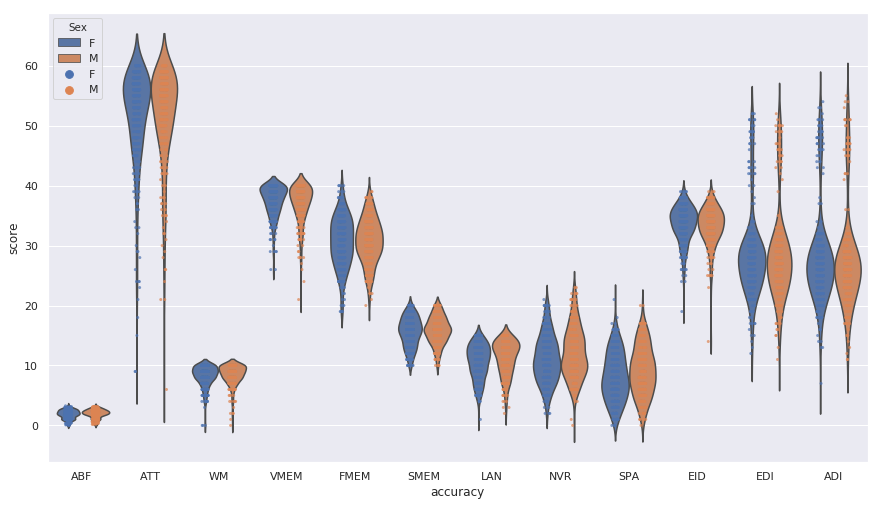

In [2]:
import seaborn as sns

pnc_behav_mental_acc = pnc_behav_mental.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_acc]
plot_data = pd.melt(pnc_behav_mental_acc, id_vars=['Sex'], value_vars = cog_label_acc,
                   var_name = "task", value_name = "score")

#print(plot_data)
sns.set(rc={'figure.figsize':(14.7,8.27)})
ax = sns.violinplot(x = "task", y = "score", data = plot_data, hue = "Sex",   errwidth = 1, inner = None)
# ax = sns.boxplot(x = "task", y = "score", data = plot_data, hue = "Sex",)
ax = sns.stripplot(x = "task", y = "score", data = plot_data, hue = "Sex",  size = 3, alpha = .7, dodge = True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xticklabels(cog_label_acc2, rotation=0)
ax.set_xlabel('accuracy')

/home/xin/environments/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Text(0.5,0,'speed')

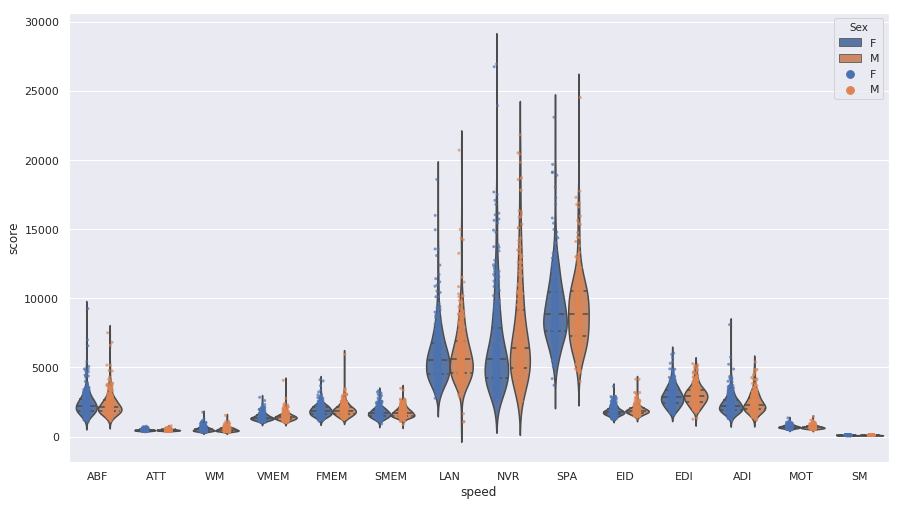

In [3]:
import seaborn as sns

pnc_behav_mental_speed = pnc_behav_mental.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_speed]
plot_data = pd.melt(pnc_behav_mental_speed, id_vars=['Sex'], value_vars = cog_label_speed,
                   var_name = "task", value_name = "score")

#print(plot_data)
sns.set(rc={'figure.figsize':(14.7,8.27)})
ax = sns.violinplot(x = "task", y = "score", data = plot_data, hue = "Sex", errwidth = 1, inner = 'quartile')
# ax = sns.boxplot(x = "task", y = "score", data = plot_data)
ax = sns.stripplot(x = "task", y = "score", data = plot_data, hue = "Sex", size = 3, alpha = .7, dodge=True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xticklabels(cog_label_speed2, rotation=0)
ax.set_xlabel('speed')

/home/xin/environments/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Text(0.5,0,'speed')

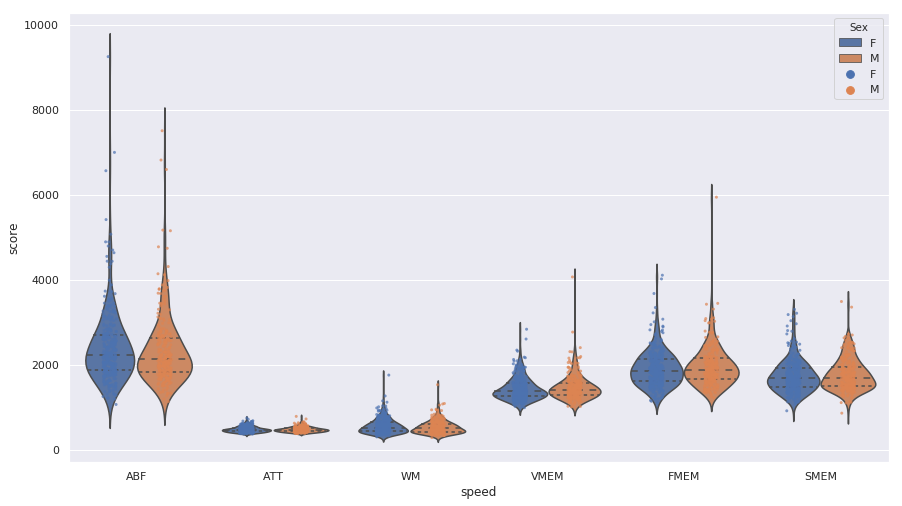

In [4]:
import seaborn as sns

pnc_behav_mental_speed = pnc_behav_mental.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_speed[0:6]]
plot_data = pd.melt(pnc_behav_mental_speed, id_vars=['Sex'], value_vars = cog_label_speed[0:6],
                   var_name = "task", value_name = "score")

#print(plot_data)
sns.set(rc={'figure.figsize':(14.7,8.27)})
ax = sns.violinplot(x = "task", y = "score", data = plot_data, hue = 'Sex',  errwidth = 1, inner = 'quartile')
# ax = sns.boxplot(x = "task", y = "score", data = plot_data)
ax = sns.stripplot(x = "task", y = "score", data = plot_data, hue = 'Sex', size = 3, alpha = .7, dodge = True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xticklabels(cog_label_speed2[0:6], rotation=0)
ax.set_xlabel('speed')

/home/xin/environments/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Text(0.5,0,'speed')

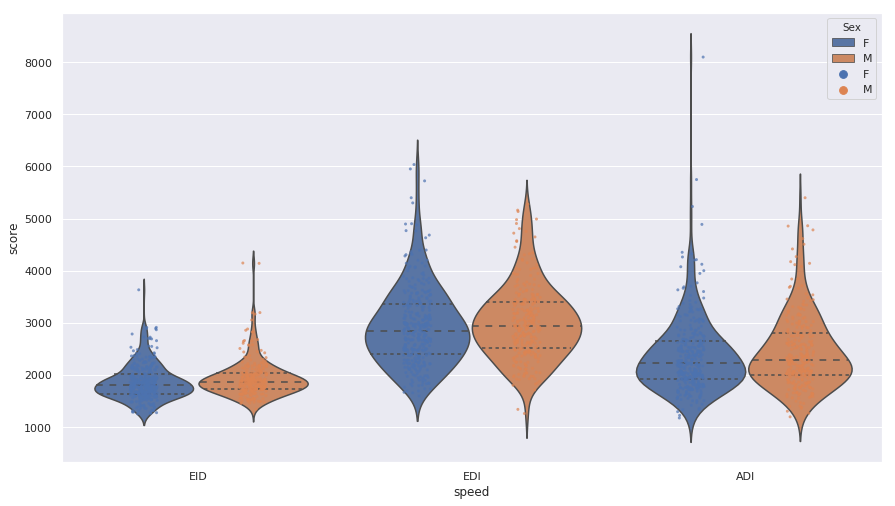

In [5]:
import seaborn as sns

pnc_behav_mental_speed = pnc_behav_mental.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_speed[9:12]]
plot_data = pd.melt(pnc_behav_mental_speed, id_vars=['Sex'], value_vars = cog_label_speed[9:12],
                   var_name = "task", value_name = "score")

#print(plot_data)
sns.set(rc={'figure.figsize':(14.7,8.27)})
ax = sns.violinplot(x = "task", y = "score", data = plot_data, hue = 'Sex',  errwidth = 1, inner = 'quartile')
# ax = sns.boxplot(x = "task", y = "score", data = plot_data)
ax = sns.stripplot(x = "task", y = "score", data = plot_data, hue = 'Sex', size = 3, alpha = .7, dodge = True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xticklabels(cog_label_speed2[9:12], rotation=0)
ax.set_xlabel('speed')

/home/xin/environments/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Text(0.5,0,'speed')

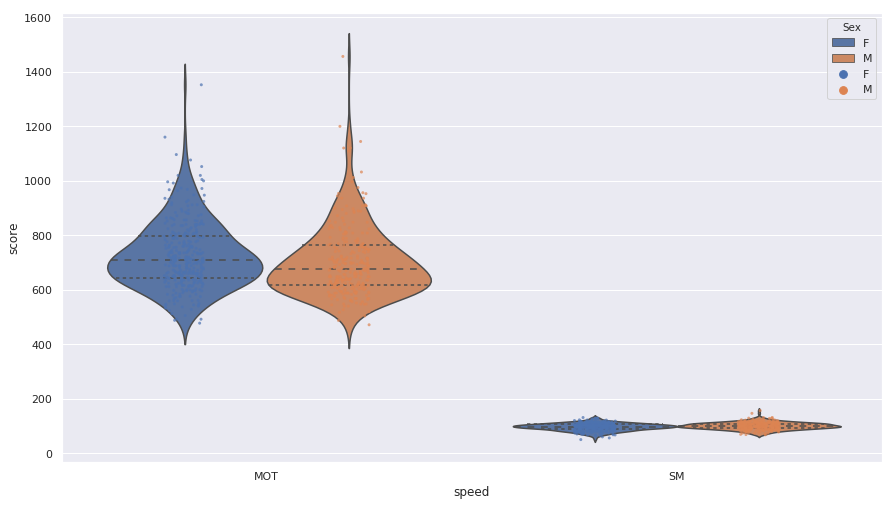

In [6]:
import seaborn as sns

pnc_behav_mental_speed = pnc_behav_mental.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_speed[12:]]
plot_data = pd.melt(pnc_behav_mental_speed, id_vars=['Sex'], value_vars = cog_label_speed[12:],
                   var_name = "task", value_name = "score")

#print(plot_data)
sns.set(rc={'figure.figsize':(14.7,8.27)})
ax = sns.violinplot(x = "task", y = "score", data = plot_data, hue = 'Sex',  errwidth = 1, inner = 'quartile')
# ax = sns.boxplot(x = "task", y = "score", data = plot_data)
ax = sns.stripplot(x = "task", y = "score", data = plot_data, hue = 'Sex', size = 3, alpha = .7, dodge = True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xticklabels(cog_label_speed2[12:], rotation=0)
ax.set_xlabel('speed')

In [7]:
# select disorders:
# disorders = ['smry_man', 'smry_dep', 'smry_gad', 'smry_sep', 'smry_phb',
#              'smry_soc','smry_pan','smry_agr','smry_ocd']

#disorders = ['smry_ptd', 'smry_dep', 'smry_phb', 'smry_soc', 'smry_agr']
disorders = ['smry_ptd', 'smry_phb', 'smry_soc']

subject_info_hc = pnc_behav_mental.loc[pnc_behav_mental["mental_hc1"]==True, 
                                       ['SUBJID', 'Sex', 'age_at_cnb']+cog_score_label]
print(subject_info_hc.shape)

subject_info_disorders = [subject_info_hc]
for dis in disorders:
    subject_info_dis = pnc_behav_mental.loc[pnc_behav_mental[dis]==4, 
                                            ['SUBJID', 'Sex', 'age_at_cnb']+cog_score_label]
    print(dis)
    #print(subject_info_dis.shape)
    
    print("number of subjects: %d" % subject_info_dis.shape[0])
    print("meam  and std of age: %.2f %.2f" % (subject_info_dis["age_at_cnb"].mean(),\
                                               subject_info_dis["age_at_cnb"].std()))
    print("range of age: %d - %d" % (subject_info_dis["age_at_cnb"].max(),\
                                     subject_info_dis["age_at_cnb"].min()))

    print("number of females: %d" % subject_info_dis.loc[subject_info_dis['Sex']==0,:].shape[0])
    print("number of males: %d" % subject_info_dis.loc[subject_info_dis['Sex']==1,:].shape[0])
    subject_info_disorders.append(subject_info_dis)


(62, 29)
smry_ptd
number of subjects: 71
meam  and std of age: 15.51 2.72
range of age: 21 - 9
number of females: 0
number of males: 0
smry_phb
number of subjects: 185
meam  and std of age: 13.60 3.19
range of age: 21 - 8
number of females: 0
number of males: 0
smry_soc
number of subjects: 142
meam  and std of age: 14.46 2.83
range of age: 21 - 8
number of females: 0
number of males: 0


In [8]:
print("Healthy control:")
print("number of subjects: %d" % subject_info_hc.shape[0])
print("meam  and std of age: %.2f %.2f" % (subject_info_hc["age_at_cnb"].mean(),\
                                           subject_info_hc["age_at_cnb"].std()))
print("range of age: %d - %d" % (subject_info_hc["age_at_cnb"].max(),\
                                 subject_info_hc["age_at_cnb"].min()))

print("number of females: %d" % subject_info_hc.loc[subject_info_hc['Sex']==0,:].shape[0])
print("number of males: %d" % subject_info_hc.loc[subject_info_hc['Sex']==1,:].shape[0])

# select behavioral scores:
disorders_behav = pd.concat(subject_info_disorders, keys = ['HC']+disorders)
# revert the last 2 cognitive scores:
disorders_behav[["mp_mp2rtcr", "tap_tot"]] = disorders_behav[["mp_mp2rtcr", "tap_tot"]]*(-1)

disorders_behav = disorders_behav.reset_index()
disorders_behav  = disorders_behav.rename(columns = {'level_0':'group'})
disorders_behav = disorders_behav.drop(columns = 'level_1')

disorders_behav = disorders_behav.rename(columns = {'age_at_cnb':'age'}, inplace = False)

Healthy control:
number of subjects: 62
meam  and std of age: 14.39 3.86
range of age: 21 - 8
number of females: 0
number of males: 0


# behavioral scores of HC and disorder group:

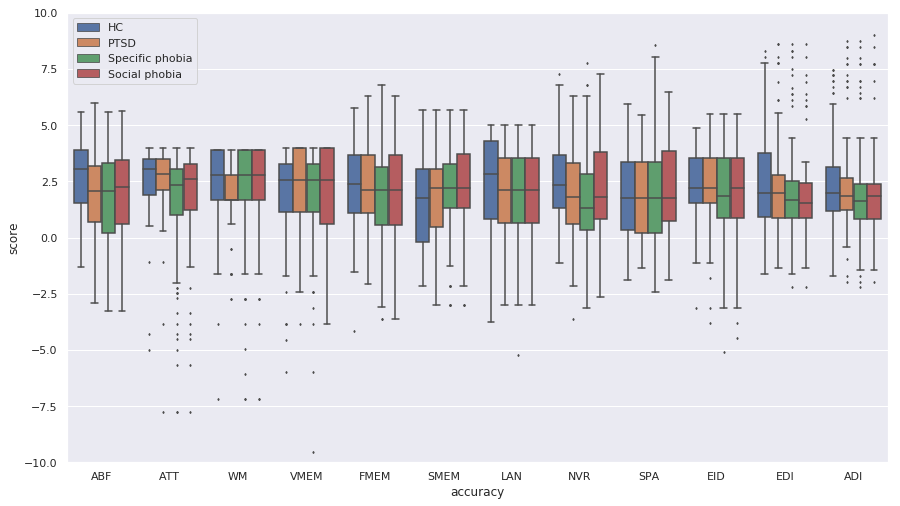

In [90]:
import seaborn as sns
# change group name:
disorders_behav = disorders_behav.replace({'group': {'smry_ptd': 'PTSD', 'smry_phb': 'Specific phobia', 
                                     'smry_soc': 'Social phobia'}})

subject_behav_acc = disorders_behav.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_acc]
data_normalize = subject_behav_acc.loc[:, cog_label_acc]

# subject_behav_acc.loc[:, cog_label_acc] = ((data_normalize-data_normalize.min())/
#                                                (data_normalize.max()-data_normalize.min()))

subject_behav_acc.loc[:, cog_label_acc] = ((data_normalize-data_normalize.mean())/
                                           data_normalize.std())*2+2

#data_normalize = subject_behav_acc.loc[:, cog_label_acc]

plot_data = pd.melt(subject_behav_acc, id_vars=['group'], value_vars = cog_label_acc,
                   var_name = "task", value_name = "score")

#print(plot_data)
sns.set(rc={'figure.figsize':(14.7,8.27)})
#g = sns.barplot(x = "task", y = "score", hue = "group", data = plot_data,  errwidth = 1, capsize=.05)
g = sns.boxplot(x = "task", y = "score", hue = "group", data = plot_data, linewidth=1.5, fliersize = 1.5)
# g.set_xticklabels(ax.get_xticklabels(), rotation=30)
g.set_xticklabels(cog_label_acc2, rotation=0)
g.axes.set_ylim(-10, 10)
g.set_xlabel('accuracy')

plt.legend(loc='upper left')



In [62]:
any(np.isnan(data_normalize.iloc[:,2]))

True

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for ilabel, ilabel2 in zip(cog_label_acc, cog_label_acc2):
    print(ilabel2)
    idx = np.isnan(subject_behav_acc[ilabel].values)
    print(pairwise_tukeyhsd(subject_behav_acc.loc[~idx, ilabel], subject_behav_acc.loc[~idx, 'group']))

ABF
      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
      HC            PTSD      -0.7899  -1.6817  0.1019 False 
      HC       Social phobia  -0.6516  -1.4326  0.1294 False 
      HC      Specific phobia  -0.783  -1.5369 -0.0291  True 
     PTSD      Social phobia   0.1383  -0.6074  0.8841 False 
     PTSD     Specific phobia  0.0069  -0.7104  0.7243 False 
Social phobia Specific phobia -0.1314  -0.7052  0.4424 False 
-------------------------------------------------------------
ATT
      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
      HC            PTSD      -0.0044  -0.8914  0.8826 False 
      HC       Social phobia  -0.4651  -1.2418  0.3117 False 
      HC      Specific phobia -0.8083  -1.5572 -0.0595  True 


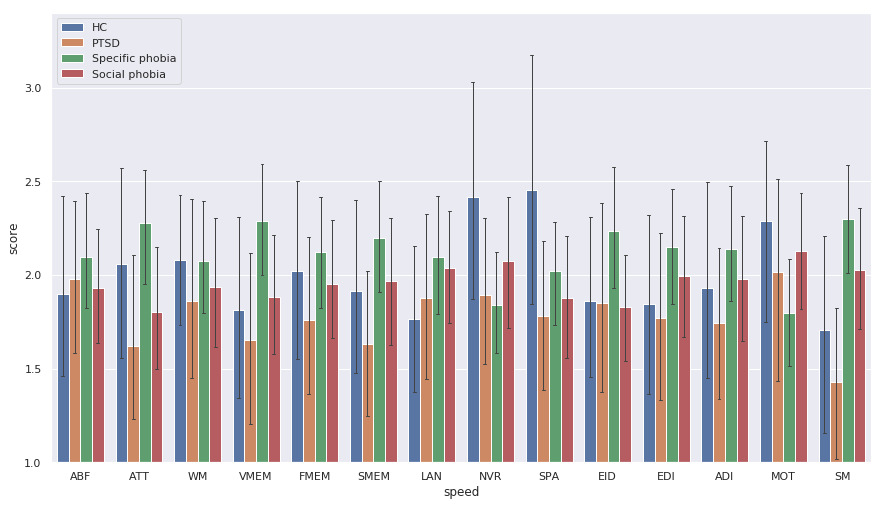

In [43]:
subject_behav_speed = disorders_behav.loc[:, ['group', 'SUBJID', 'Sex']+cog_label_speed]

data_normalize = subject_behav_speed.loc[:, cog_label_speed]

# subject_behav_speed.loc[:, cog_label_speed] = ((data_normalize-data_normalize.min())/
#                                                (data_normalize.max()-data_normalize.min()))

subject_behav_speed.loc[:, cog_label_speed] = ((data_normalize-data_normalize.mean())/
                                               data_normalize.std())*2+2

plot_data = pd.melt(subject_behav_speed, id_vars=['group'], value_vars = cog_label_speed,
                   var_name = "task", value_name = "score")

#print(plot_data)

sns.set(rc={'figure.figsize':(14.7,8.27)})
ax = sns.barplot(x = "task", y = "score", hue = "group", data = plot_data, errwidth = 1, capsize = .05)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xticklabels(cog_label_speed2, rotation=0)
ax.set_xlabel('speed')
ax.axes.set_ylim(1, 3.4)
plt.legend(loc='upper left')